# Etude sur le dataset finance projet3


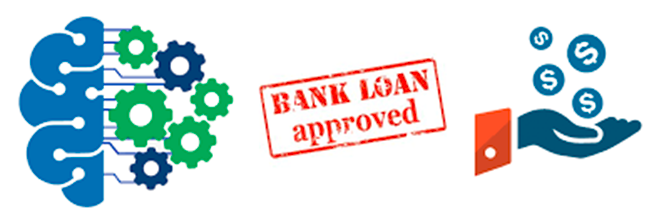
_________________


    -Variable Description
    -Loan_ID Unique Loan ID - Il s'agit de l'identifiant unique 
    -Gender - Male/ Female - Il s'agit du genre Male/Female pour Homme et Femme
    -Married - Applicant married (Y/N) - Il s'agit de savoir si la personne est mariée ou non
    -Dependents - Number of dependents - Il s'agit du Nombre de personnes à charge
    -Education - Applicant Education (Graduate/ Under Graduate) - Formation du candidat (diplômé/non diplômé)
    -Self_Employed - Self employed (Y/N) - Travailleurs indépendants (Oui/Non)
    -ApplicantIncome - Applicant income - Revenu du demandeur
    -CoapplicantIncome - Coapplicant income - Revenu d'un second demandeur
    -LoanAmount - Loan amount in thousands - Montant du prêt en milliers
    -Loan_Amount_Term - Term of loan in months - Durée du prêt en mois
    -Credit_History - credit history meets guidelines - les antécédents de crédit répondent aux lignes directrices
    -Property_Area - Urban/ Semi Urban/ Rural - Zone_de_propriété (Urbain/ Semi-urbain/ Rural)
    -Loan_Status - Loan approved (Y/N) - Prêt approuvé (O/N)
    
____________________

L'Etude des de savoir si un pret peut être accordé en fonction des parametres d'entrées, 
On est donc dans un problème lié à la classification
Nous allons commencer par étudier les données, les visualiser et les nettoyer le dataset
Ensuite nous nous pencherons sur les différents algorithme de classification
Puis nous continuerons par afficher les etrics pertinents et tirer les conclusions de l'étude




### <center>  Exploration de données </center>

In [174]:
# importer les librairie
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [175]:
# importer les librairies ML

In [176]:
# importer les données
dataset = pd.read_csv("datasets/Train.csv", delimiter = ",")
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [177]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [178]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [179]:
# Compter le nombre de fois ou il y'a les différentes valeurs
columns = dataset.columns.to_list()
for i in columns:
    print(dataset[i].value_counts())

LP002444    1
LP002244    1
LP002231    1
LP002626    1
LP002446    1
           ..
LP002194    1
LP002821    1
LP002953    1
LP001430    1
LP002223    1
Name: Loan_ID, Length: 614, dtype: int64
Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64
0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64
120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: L

In [180]:
# Compter le nombre de valeurs null par colonne dans le dataset
dataset.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### <center>  Visualisation de données </center>

Gender
AxesSubplot(0.125,0.125;0.775x0.755)
Married
AxesSubplot(0.125,0.125;0.775x0.755)
Self_Employed
AxesSubplot(0.125,0.125;0.775x0.755)
Loan_Status
AxesSubplot(0.125,0.125;0.775x0.755)
Credit_History
AxesSubplot(0.125,0.125;0.775x0.755)


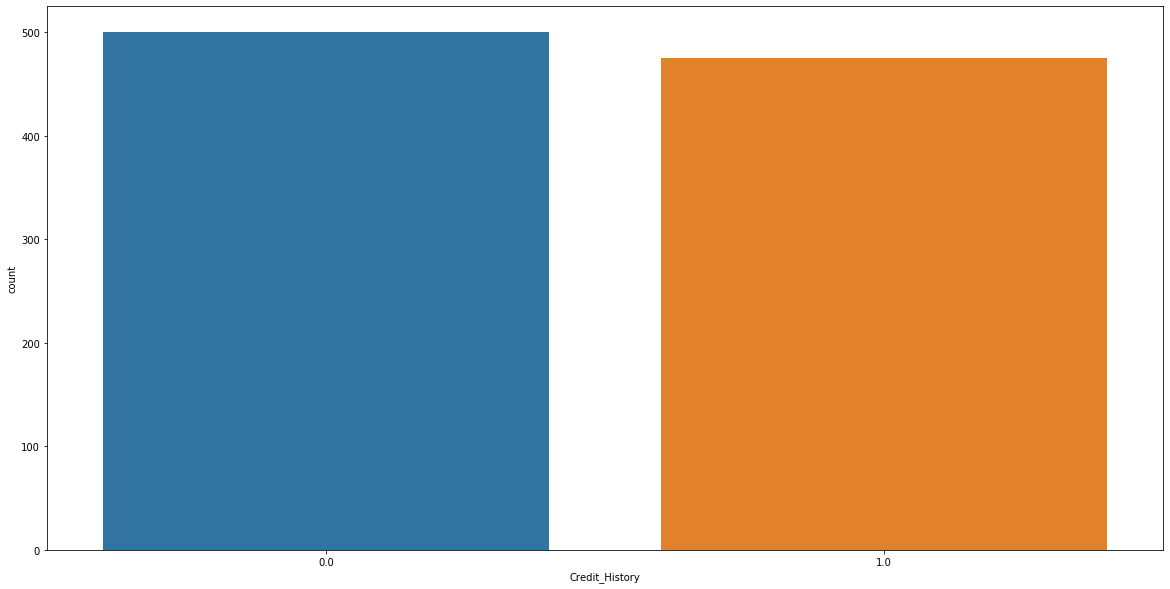

In [181]:
#Plotting the distribution of Outcome
tab = ["Gender","Married", "Self_Employed","Loan_Status", "Credit_History"]
for i in tab:
    print(i)
    print(sns.countplot(x= i, data = dataset))


In [182]:
# Importer les packages machine learning
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix, classification_report  

# Importer les packages machine learning
#! pip install xgboost
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, classification_report
from xgboost import XGBClassifier
import xgboost as xgb

from sklearn import svm
from sklearn.preprocessing import StandardScaler




In [183]:
# Séparation du jeu de données entre les datas et les targets
df = dataset
df = pd.get_dummies(df)


In [184]:
df = df.dropna()

In [185]:
X = df.iloc[:, 1:-2]
y = df.iloc[:,-1]

In [186]:
X

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1508.0,128.0,360.0,1.0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,0.0,66.0,360.0,1.0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
3,2358.0,120.0,360.0,1.0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
4,0.0,141.0,360.0,1.0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
5,4196.0,267.0,360.0,1.0,0,0,0,0,0,1,...,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,71.0,360.0,1.0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
610,0.0,40.0,180.0,1.0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,1,0,0
611,240.0,253.0,360.0,1.0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
612,0.0,187.0,360.0,1.0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1


In [187]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status_Y, Length: 529, dtype: uint8

In [188]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [189]:
X_scaled

array([[-0.01363845, -0.21245735,  0.27235037, ...,  1.55335225,
        -0.80816149, -0.67327313],
       [-0.61159823, -0.95029897,  0.27235037, ..., -0.64376898,
        -0.80816149,  1.48528132],
       [ 0.32340784, -0.30766272,  0.27235037, ..., -0.64376898,
        -0.80816149,  1.48528132],
       ...,
       [-0.51643222,  1.27512655,  0.27235037, ..., -0.64376898,
        -0.80816149,  1.48528132],
       [-0.61159823,  0.48968225,  0.27235037, ..., -0.64376898,
        -0.80816149,  1.48528132],
       [-0.61159823, -0.152954  ,  0.27235037, ..., -0.64376898,
         1.23737645, -0.67327313]])

In [190]:
# Préparer les données d'entrainement et test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state = 0)

In [191]:
# Création du model
model = svm.SVC(kernel = "linear")
# Parametres (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
# --- criterion ("gini", "entropy") détermine l'indice d'impureté (https://intelligence-artificielle.agency/arbre-de-decision-gini/)
# --- max_depth (integer) détermine la profondeur de l'arbre
# --- min_simple_split (nb minimum de division)
# --- min_simple_leaf (la feuille ne peut pas avoir un nb inférieur au nb défini en parametre)
# --- max_features (nb de features d'entrées par profondeur)
# --- splitter ("best", "random", meilleur condition pour diviser un node)
# --- min_impurity_decrease (ne descent pas si le nb d'impureté n'est pas respecté, exemple : si d'un split à un autre tu ne gagnes pas inimum x en impureté alors tu ne split pas)

In [192]:
# Appliquer le modèle
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [193]:
# Vérifier la précision méthode 1
print('precision', metrics.accuracy_score(y_test, y_pred))

precision 0.7735849056603774


In [194]:
# Vérifier tuus les metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57        20
           1       0.73      1.00      0.85        33

    accuracy                           0.77        53
   macro avg       0.87      0.70      0.71        53
weighted avg       0.83      0.77      0.74        53

